In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('OnlineRetail.csv', encoding= 'latin1')
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [3]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['InvoiceYearMonth'] = data['InvoiceDate'].map(lambda date: date.year * 100 + date.month)
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,201012
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,201012
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,201012
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,201012
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,201012


In [4]:
data['Revenue'] = data['Quantity'] * data['UnitPrice']
month_revenue = data.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()
month_revenue.head(10)

,InvoiceYearMonth,Revenue
0,201012,748957.020
1,201101,560000.260
2,201102,498062.650
3,201103,683267.080
4,201104,493207.121
5,201105,723333.510
6,201106,691123.120
7,201107,681300.111
8,201108,682680.510
9,201109,1019687.622


Text(0.5, 1.0, 'Monthly Revenue')

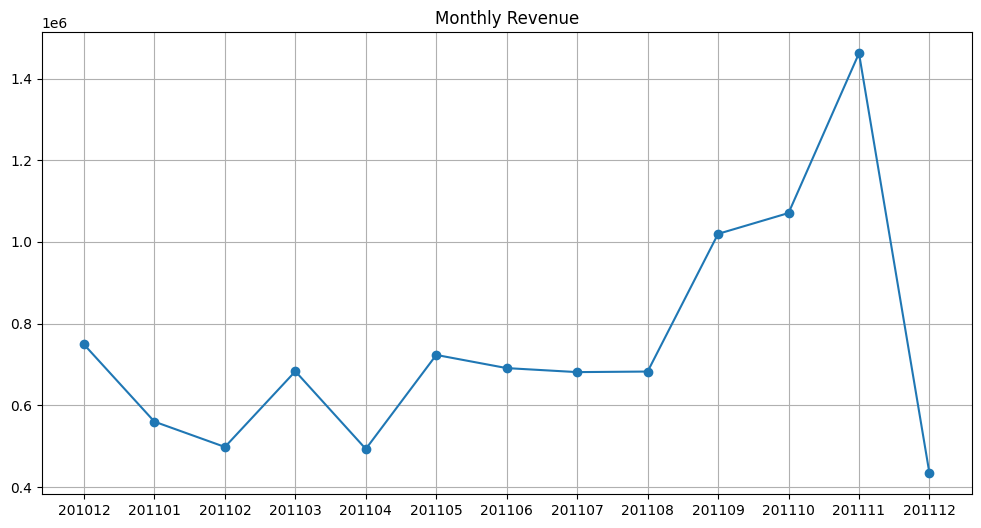

In [5]:
#grandir le plt
plt.figure(figsize=(12,6))

plt.plot(month_revenue['InvoiceYearMonth'].to_numpy(dtype = str), month_revenue['Revenue'], marker='o')
plt.grid()
plt.title('Monthly Revenue')

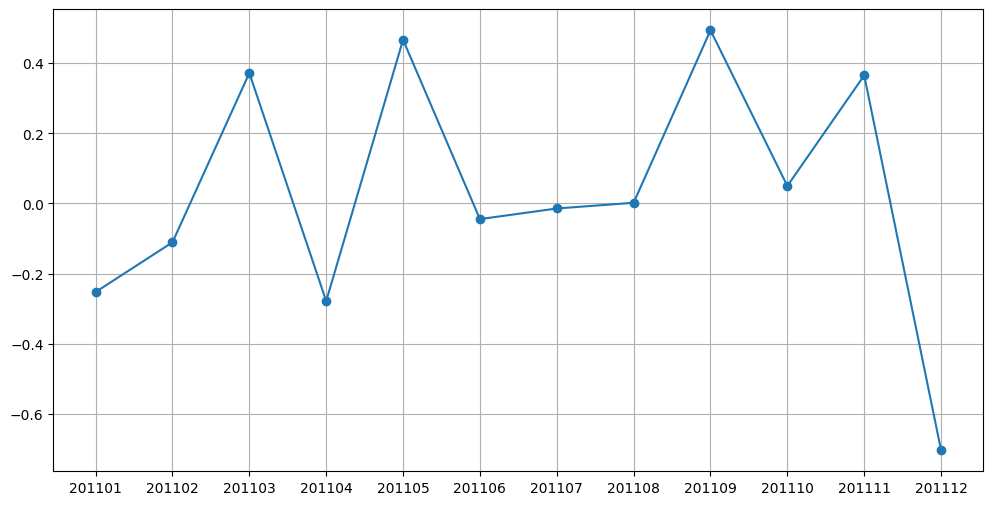

In [6]:
month_revenue['MonthlyGrowth'] = month_revenue['Revenue'].pct_change()
plt.figure(figsize=(12,6))

plt.plot(month_revenue['InvoiceYearMonth'].to_numpy(dtype= str), month_revenue['MonthlyGrowth'], marker='o')
plt.grid()

In [7]:
#Monthly active customers

#determin uk customers
customers_uk = data.query("Country == 'United Kingdom'").reset_index(drop= True)
cus_monthly_active = customers_uk.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()

cus_monthly_active

,InvoiceYearMonth,CustomerID
0,201012,871
1,201101,684
2,201102,714
3,201103,923
4,201104,817
5,201105,985
6,201106,943
7,201107,899
8,201108,867
9,201109,1177


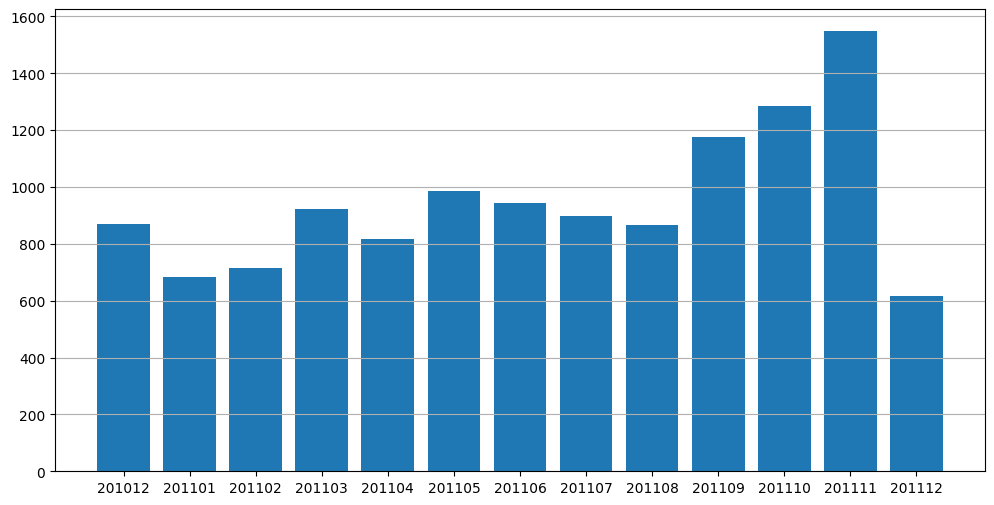

In [8]:
plt.figure(figsize = (12,6))

plt.bar(cus_monthly_active['InvoiceYearMonth'].to_numpy(dtype= str) , cus_monthly_active['CustomerID'])
plt.grid(axis = 'y')

In [9]:
monthly_sales_number = customers_uk.groupby('InvoiceYearMonth')['Quantity'].sum().reset_index()

monthly_sales_number

,InvoiceYearMonth,Quantity
0,201012,298101
1,201101,237381
2,201102,225641
3,201103,279843
4,201104,257666
5,201105,306452
6,201106,258522
7,201107,324129
8,201108,319804
9,201109,458490


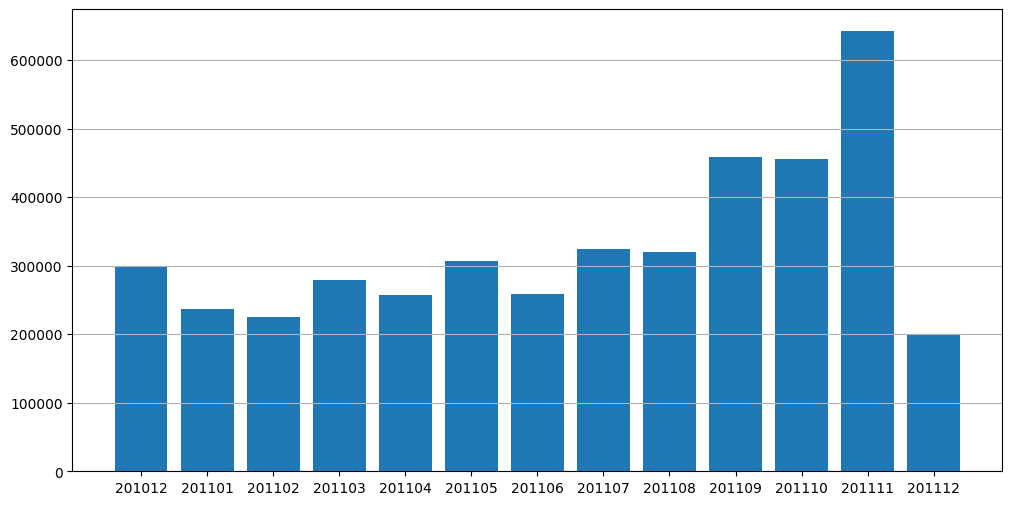

In [10]:
plt.figure(figsize = (12,6))

plt.bar(monthly_sales_number['InvoiceYearMonth'].to_numpy(dtype= str) , monthly_sales_number['Quantity'])
plt.grid(axis = 'y')

In [11]:
#Start to Buy Cheaper Products

#Average of revenue per month
monthly_order_avg = customers_uk.groupby('InvoiceYearMonth')['Revenue'].mean().reset_index()
monthly_order_avg

,InvoiceYearMonth,Revenue
0,201012,16.865860
1,201101,13.614680
2,201102,16.093027
3,201103,16.716166
4,201104,15.773380
5,201105,17.713823
6,201106,16.714748
7,201107,15.723497
8,201108,17.315899
9,201109,18.931723


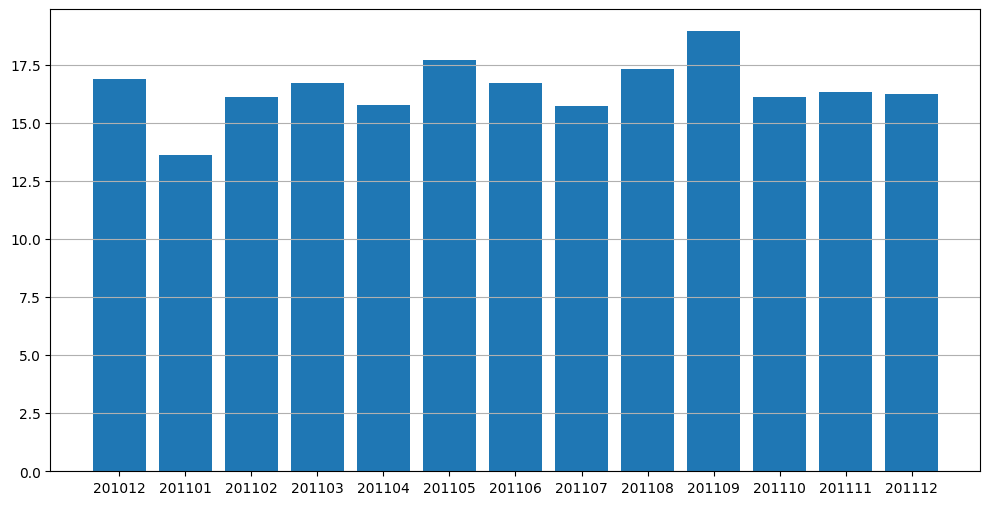

In [12]:
plt.figure(figsize = (12,6))
plt.bar(monthly_order_avg['InvoiceYearMonth'].to_numpy(dtype = str), monthly_order_avg['Revenue'])
plt.grid(axis='y')

In [13]:
#new customers:
cus_min_purchase = customers_uk.groupby('CustomerID').InvoiceDate.min().reset_index()
cus_min_purchase.columns = ['CustomerID','MinPurchaseDate']
cus_min_purchase['MinPurchaseYearMonth'] = cus_min_purchase['MinPurchaseDate'].map(lambda date: date.year * 100 + date.month)

customers_uk = pd.merge(customers_uk, cus_min_purchase, on = 'CustomerID')

customers_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,MinPurchaseDate,MinPurchaseYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,2010-12-01 08:26:00,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,2010-12-01 08:26:00,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012


In [14]:
customers_uk['UserType'] = 'New'
customers_uk.loc[customers_uk['InvoiceYearMonth'] > customers_uk['MinPurchaseYearMonth'],'UserType'] = 'Existing'

#calculate the Revenue per month for each user type
monthly_user_type_revenue = customers_uk.groupby(['InvoiceYearMonth','UserType'])['Revenue'].sum().reset_index()

#filtering
monthly_user_type_revenue = monthly_user_type_revenue.query("InvoiceYearMonth != 201012 and InvoiceYearMonth != 201112")

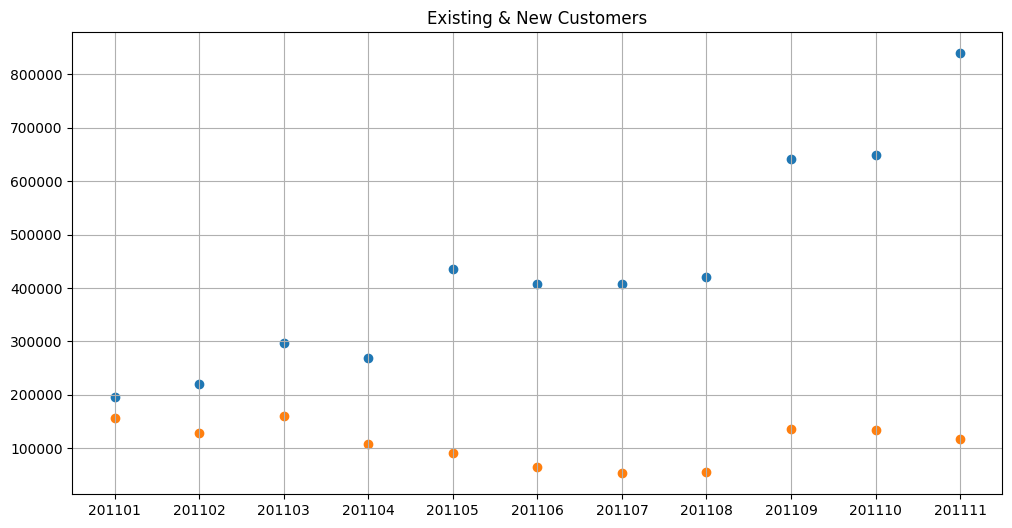

In [15]:
plt.figure(figsize = (12,6))
plt.scatter(monthly_user_type_revenue.query("UserType == 'Existing'")['InvoiceYearMonth'].to_numpy(dtype = str),
            monthly_user_type_revenue.query("UserType == 'Existing'")['Revenue'], label='Existing')

plt.scatter(monthly_user_type_revenue.query("UserType == 'New'")['InvoiceYearMonth'].to_numpy(dtype = str),
            monthly_user_type_revenue.query("UserType == 'New'")['Revenue'], label='New')
plt.title("Existing & New Customers")
plt.grid()
plt.show()

In [16]:
#Existing customers are showing a positive trend and tell us that our customer base is growing but new customers have a slight negative trend.

In [17]:
tx_user_ratio = customers_uk.query("UserType == 'New'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique() / customers_uk.query("UserType == 'Existing'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique()

tx_user_ratio = tx_user_ratio.reset_index()
tx_user_ratio = tx_user_ratio.dropna()

tx_user_ratio

,InvoiceYearMonth,CustomerID
1,201101,1.124224
2,201102,0.904000
3,201103,0.792233
4,201104,0.510166
5,201105,0.343793
6,201106,0.281250
7,201107,0.236589
8,201108,0.192572
9,201109,0.304878
10,201110,0.328852


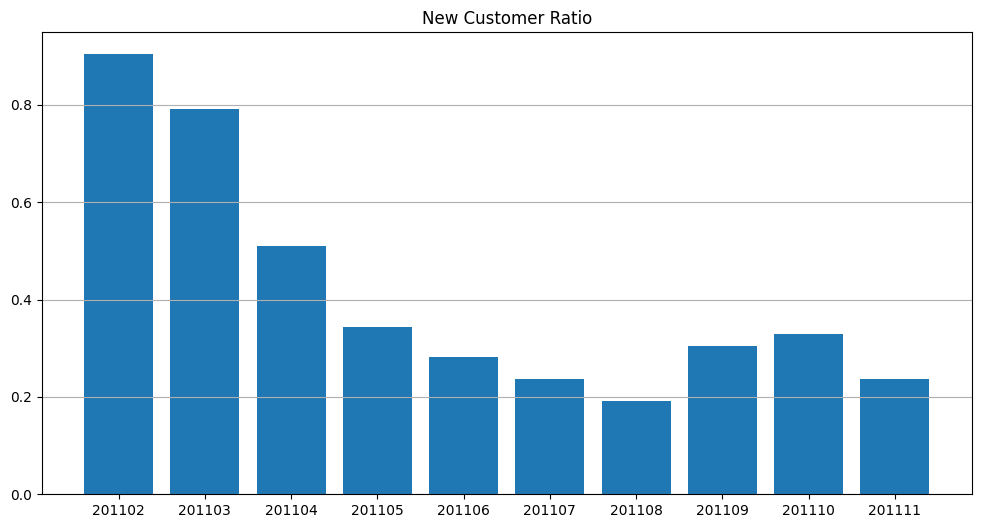

In [18]:
plt.figure(figsize = (12,6))
plt.bar(tx_user_ratio.query("InvoiceYearMonth>201101 and InvoiceYearMonth<201112")['InvoiceYearMonth'].to_numpy(dtype = str),
        tx_user_ratio.query("InvoiceYearMonth>201101 and InvoiceYearMonth<201112")['CustomerID'])
plt.title("New Customer Ratio")
plt.grid(axis='y')

In [19]:
#we assumed on Feb, all customers were New

In [20]:
tx_user_purchase = customers_uk.groupby(['CustomerID','InvoiceYearMonth'])['Revenue'].sum().reset_index()
tx_user_purchase

,CustomerID,InvoiceYearMonth,Revenue
0,12346.0,201101,0.00
1,12747.0,201012,706.27
2,12747.0,201101,303.04
3,12747.0,201103,310.78
4,12747.0,201105,771.31
...,...,...,...
12325,18283.0,201110,114.65
12326,18283.0,201111,651.56
12327,18283.0,201112,208.00
12328,18287.0,201105,765.28


In [21]:
retention = pd.crosstab(tx_user_purchase['CustomerID'] , tx_user_purchase['InvoiceYearMonth']).reset_index()
retention.head()

InvoiceYearMonth,CustomerID,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1
2,12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1
3,12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1
4,12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1


In [22]:
#create an array of dictionary which keeps Retained & Total User count for each month
month = retention.columns[2:]
retention_array = []
for i in range(len(month)-1):
    retention_data = {}
    selected_month = month[i+1]
    prev_month = month[i]
    retention_data['InvoiceYearMonth'] = int(selected_month)
    retention_data['TotalUserCount'] = retention[selected_month].sum()
    retention_data['RetainedUserCount'] = retention[(retention[selected_month]>0) & (retention[prev_month]>0)][selected_month].sum()
    
    retention_array.append(retention_data)
    

In [23]:
#convert the array to dataframe and calculate Retention Rate
retention = pd.DataFrame(retention_array)
retention['RetentionRate'] = retention['RetainedUserCount'] / retention['TotalUserCount']
retention

,InvoiceYearMonth,TotalUserCount,RetainedUserCount,RetentionRate
0,201102,714,263,0.368347
1,201103,923,305,0.330444
2,201104,817,310,0.379437
3,201105,985,369,0.374619
4,201106,943,417,0.442206
5,201107,899,379,0.421580
6,201108,867,391,0.450980
7,201109,1177,417,0.354291
8,201110,1285,502,0.390661
9,201111,1548,616,0.397933


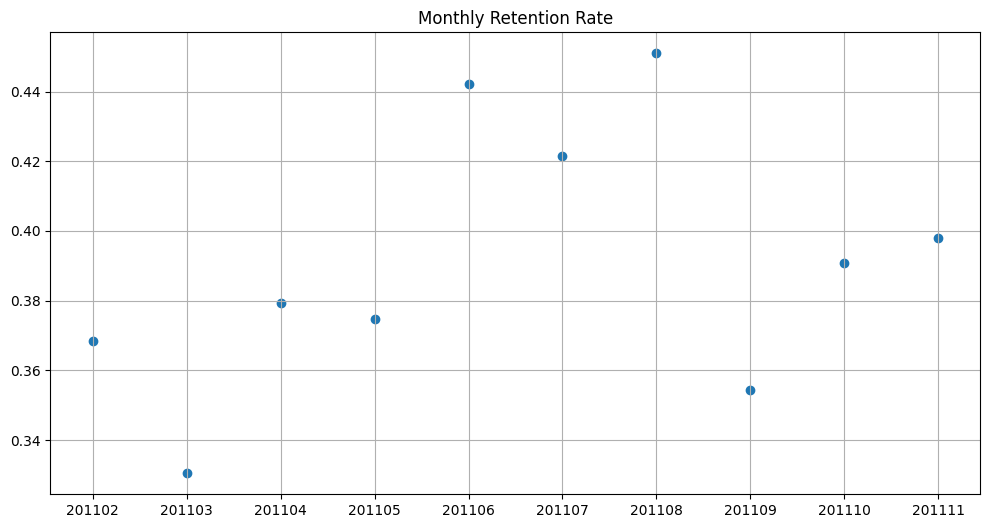

In [24]:
#plot the retention rate graph
plt.figure(figsize=(12,6))
plt.scatter(retention.query("InvoiceYearMonth < 201112")['InvoiceYearMonth'].to_numpy(dtype = str), 
            retention.query("InvoiceYearMonth < 201112")['RetentionRate'])

plt.title('Monthly Retention Rate')
plt.grid()

In [28]:
#create our retention table again with crosstab() and add firs purchase year month view
retention = pd.crosstab(tx_user_purchase['CustomerID'], tx_user_purchase['InvoiceYearMonth']).reset_index()
retention = pd.merge(retention, cus_min_purchase[['CustomerID','MinPurchaseYearMonth']], on='CustomerID')
new_column_names = ['m_' + str(column) for column in retention.columns[:-1]]
new_column_names.append('MinPurchaseYearMonth')
retention.columns = new_column_names

#create the array of Retained users for each cohort monthly
retention_array = []
for i in range(len(month)):
    retention_data = {}
    selected_month = month[i]
    prev_month = month[:i]
    next_month = month[i+1:]
    for prev in prev_month:
        retention_data[prev] = np.nan
        
    total_user_count = retention[retention.MinPurchaseYearMonth == selected_month].MinPurchaseYearMonth.count()  
    retention_data['TotalUserCount'] = total_user_count
    retention_data[selected_month] = 1

    query = 'MinPurchaseYearMonth == {}'.format(selected_month)


    for next_mo in next_month :
        new_query = query + "and {} > 0".format(str('m_' + str(next_mo)))
        retention_data[next_mo] = np.round(retention.query(new_query)['m_' + str(next_mo)].sum() / total_user_count, 2)
    
    retention_array.append(retention_data)    

In [29]:
retention = pd.DataFrame(retention_array)
retention.index = month

#showing new cohort based retention table
retention

,TotalUserCount,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
InvoiceYearMonth,,,,,,,,,,,,,
201101,362,1.0,0.23,0.28,0.25,0.34,0.29,0.26,0.26,0.31,0.35,0.36,0.15
201102,339,NaN,1.00,0.25,0.19,0.28,0.28,0.25,0.26,0.28,0.28,0.31,0.10
201103,408,NaN,NaN,1.00,0.19,0.26,0.22,0.23,0.17,0.26,0.24,0.29,0.09
201104,276,NaN,NaN,NaN,1.00,0.22,0.22,0.22,0.21,0.23,0.23,0.26,0.08
201105,252,NaN,NaN,NaN,NaN,1.00,0.23,0.17,0.17,0.21,0.24,0.27,0.10
201106,207,NaN,NaN,NaN,NaN,NaN,1.00,0.21,0.16,0.25,0.26,0.32,0.10
201107,172,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.20,0.19,0.23,0.28,0.11
201108,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.26,0.23,0.26,0.14
201109,275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.29,0.33,0.12
